## pre compute the tokens

In [6]:
from bpe_tokenizer import BPETokenizer
import numpy as np

In [3]:
n_rounds = 10
outfile = 'dataset/dailymail/onebigfile_test.npy'

In [2]:
tokenizer = BPETokenizer('dataset/dailymail/onebigfile_test.txt',
                         'BPE_vocab_10000.pickle',
                         max_tokens = 10000,
                         drop = 0.1,
                         max_len = 5000)

----- BAD STUFF -----
MINI TEST. Audi TT Roadster 2.0 TFSI S line Quattro (230PS). Price as driven: £54,180. Evolution: The new 2.0 TFSI S line Quattro (pictured) is fun to drive with lively acceleration that takes it from rest to 62 mph in just 6.1. GOOD. The interior of a manual version of the Audi soft-top can be seen here. BAD. We've enjoyed some of the highest temperatures of the year this week. The range starts at £31,995 and the Audi can cost as much as £50,000. No matter how good, the new Audi TT still has nothing on the 1999 model. With the sunshine beaming this week and some of the highest temperatures recorded so far this year, what better moment to splash out on the new third-generation Audi TT Roadster. It goes on sale this month. Just the time to get the roof off on this softtop German sports car, which has established itself as a firm favourite in the 16 years it has been on the road. I drove the fully stocked four-wheel-drive 2-litre TFSI in S-line quattro trim with 230

In [5]:
n = len(tokenizer.stories)
n

998

In [11]:
np.uint8(256), np.uint16

0

In [17]:
np.array(tokenizer.tokenize(tokenizer.stories[i]), dtype=np.uint16)

array([ 212,  224, 5068, 4410,  885, 3247, 2591, 2239, 1329,  174,  132,
         78,   10, 3797,   52,   20,  201,  933,    5, 4022,    9,  622,
       9672,   57,   24,  294,   40,   44, 1809,   78,   11, 1988,  894,
          6, 2591, 2239,  177,  535,   56,   32, 2768,    5,  166, 2076,
         12,  224, 5068, 4751,  115,    7,  345,  579,   79,   71,   12,
        391, 3736,  183,    7, 2209,    4,   69,   14,   95,  156,  498,
          4, 9377,    4,  206,    9, 1769,   43, 1364,    6,    5,  313,
       5159, 1003,   20,  110, 1841,  132,    5, 3358,  772,   12,    5,
       4022,   20,   14,  903,   25, 5805,  475,    5, 4586,  804,    6,
        212,  224,  186,  597, 9696, 9060,  771, 3247, 2591, 2239,   40,
         24,  294, 1809,   78,   52,  498,    4,   14,  903,   25,    5,
       4022,    6,    5,  176, 5657, 4770,  949,   10,  103,   11,  145,
          4, 4496,   36, 2033,   13,    9,    5,  294,  271, 9725, 4950,
        452, 1770,    4,   13,   10,  708,  294,   

In [36]:
output = []
nn = 0
for story, summary in zip(tokenizer.stories, tokenizer.summaries):
    arr1 = np.array(tokenizer.tokenize(story), dtype=np.uint16)
    arr2 = np.array(tokenizer.tokenize(summary), dtype=np.uint16)
    nn += len(arr1) + len(arr2)
    output.append(arr1)
    output.append(arr2)

In [48]:
output[0], output[-1]

(array([ 596, 4977,   31,  744,  296,  534, 5950,   11, 3403, 7018,  677,
        2628,  938, 4369,  257,  221,  311, 1074,  161,  835,    9,   10,
        5614, 1447,   82, 6273, 4257,  425, 1949, 1716,  100, 7106,   13,
           5,  441, 8423,    4, 4820,    6,  610, 5770,  563,  383, 8982,
         250,  698,  693,  400, 8454, 1984,   51, 1274,    4,   16,   72,
         371,    8,   21,  441,  174, 2700, 1776, 6741,   37, 8935, 3764,
          98,  314, 7017,    8,   21,  282,   96,   45,  335,  310, 1568,
         938,    4,   10, 5567, 2198,  872, 3955,    6, 1716,  100, 7106,
        1514, 1175,   21, 3350, 1700,   21,  138,   24,   90,  616,   12,
           5,  371,   42, 5592,   31, 1255,    7,   37,    5, 2659,  138,
          10, 6643,  616,   26,  534, 5950,  792,  321, 1848,  835,   10,
        1170, 3810, 1366,  917,    6,  744,  296,  534, 5950,   55, 1972,
          54, 2608,   24, 1592,  837,  150,  425, 1949, 1716,  100, 7106,
          23,   24, 1074,  161,  835, 

In [38]:
nn * 2 /1024/1024

2.0415401458740234

In [44]:
np.save('test.npy', np.array(output, dtype=object), allow_pickle=True)

In [45]:
!ls -lh test.npy

-rw-r--r--  1 zma  staff   2.1M Nov 24 16:54 test.npy


In [46]:
readback = np.load('test.npy', allow_pickle=True)

In [49]:
readback[-1], readback[-2]

(array([6045,  164, 3148, 4200, 1966,    9, 2327, 1922,   25,  659, 8423,
           4,   13, 1826,  110, 6345,  238,  544,   15,    6,  256, 6166,
         782,  383,  900,  987, 1365,  556, 7337,    7,  129, 3593,   16,
         420,  993,   12,    5,  463,   19,  471,  393, 7081,   77,    6,
         218, 9197,    4,   88, 3183,   96,  535,   56, 6123, 6231,  145,
        5040, 1302, 1100,  366,    4,  252,   32, 2394,   70, 1518, 2982,
         117,    6], dtype=uint16),
 array([ 136, 1750, 1223,   41,  547, 2926,   52, 7029, 5499, 1148,  728,
          14,  448,   89,   82, 3183, 3795,    4,    9, 6914,   16, 3751,
         242, 1229, 1330,    6,  256, 6166, 3318,  782,  383,  900,  987,
        1101,    9, 1425,    5, 1922,   25, 1096,    4, 1127,  170,   12,
        1069, 1393,   13, 1826,  110, 6345,  121,    4, 1066,    6, 1857,
         121,  130,  383,  900,  987,    7, 5173,    7,   18,   10, 3965,
         130, 4200,   13, 7470,  810,   11,  531,   19,   88, 3183,   96,
  

In [50]:
output = []
nn = 0
for i, (story, summary) in enumerate(zip(tokenizer.stories, tokenizer.summaries)):
    if i % 1000 == 0:
        print(i)
    for _ in range(n_rounds):
        arr1 = np.array(tokenizer.tokenize(story), dtype=np.uint16)
        arr2 = np.array(tokenizer.tokenize(summary), dtype=np.uint16)
        nn += len(arr1) + len(arr2)
        output.append(arr1)
        output.append(arr2)

0


In [52]:
output[0][:10], output[2][:10]

(array([ 596, 4977, 1394, 4853,  744,  296, 1175, 3813,    4,   11],
       dtype=uint16),
 array([ 596, 4977,   31,  744,  296, 1175, 3813,    4, 1657,    4],
       dtype=uint16))

In [54]:
in_file = 'dataset/dailymail/onebigfile_validation.txt'
out_file = 'dataset/dailymail/onebigfile_validation.npy'
n_rounds = 1
tokenizer = BPETokenizer(in_file,
                         'BPE_vocab_10000.pickle',
                         max_tokens = 10000,
                         drop = 0.0,
                         max_len = 5000)

output = []
for i, (story, summary) in enumerate(zip(tokenizer.stories, tokenizer.summaries)):
    if i % 1000 == 0:
        print(i)
    for _ in range(n_rounds):
        arr1 = np.array(tokenizer.tokenize(story), dtype=np.uint16)
        arr2 = np.array(tokenizer.tokenize(summary), dtype=np.uint16)
        output.append(arr1)
        output.append(arr2)

np.save(out_file, np.array(output, dtype=object), allow_pickle=True)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


In [56]:
from datetime import datetime

In [57]:
datetime.now()

datetime.datetime(2022, 11, 24, 17, 17, 0, 738328)

In [58]:
in_file = 'dataset/dailymail/onebigfile_train.txt'
out_file = 'dataset/dailymail/onebigfile_train.npy'
n_rounds = 10
tokenizer = BPETokenizer(in_file,
                         'BPE_vocab_10000.pickle',
                         max_tokens = 10000,
                         drop = 0.1,
                         max_len = 5000)

output = []
for i, (story, summary) in enumerate(zip(tokenizer.stories, tokenizer.summaries)):
    if i % 1000 == 0:
        print(i, datetime.now())
    for _ in range(n_rounds):
        arr1 = np.array(tokenizer.tokenize(story), dtype=np.uint16)
        arr2 = np.array(tokenizer.tokenize(summary), dtype=np.uint16)
        output.append(arr1)
        output.append(arr2)

np.save(out_file, np.array(output, dtype=object), allow_pickle=True)

----- BAD STUFF -----
MINI TEST. Audi TT Roadster 2.0 TFSI S line Quattro (230PS). Price as driven: £54,180. Evolution: The new 2.0 TFSI S line Quattro (pictured) is fun to drive with lively acceleration that takes it from rest to 62 mph in just 6.1. GOOD. The interior of a manual version of the Audi soft-top can be seen here. BAD. We've enjoyed some of the highest temperatures of the year this week. The range starts at £31,995 and the Audi can cost as much as £50,000. No matter how good, the new Audi TT still has nothing on the 1999 model. With the sunshine beaming this week and some of the highest temperatures recorded so far this year, what better moment to splash out on the new third-generation Audi TT Roadster. It goes on sale this month. Just the time to get the roof off on this softtop German sports car, which has established itself as a firm favourite in the 16 years it has been on the road. I drove the fully stocked four-wheel-drive 2-litre TFSI in S-line quattro trim with 230

19000
20000
21000
22000
23000
----- BAD STUFF -----
Sportmsmail's Chief Sports Reporter Matt Lawton broke the story of Malky Mackay and Iain Moody's text exchange. Here's how the news rocked the football world... Wednesday. Exclusive: Chief Sports Reporter Matt Lawton's story in Thursday's Daily Mail. Thursday. Revelation: Sportsmail broke the story of Mackay and Moody's text message exchanges. Friday. Saturday. Texts: The LMA described Malky Mackay's messages to Iain Moody as ‘friendly text message banter’ Offensive: Sportsmail can reveal Malky Mackay called Vincent Tan a 'chink' in a disturbing text exchange. Sportsmail exclusively revealed Malky Mackay and Iain Moody's text exchange on Thursday. Chief Sports Reporter Matt Lawton had chased story for weeks. Mackay pulled out of running to be new Crystal Palace boss. Moody resigned from post at Selhursrt Park following revelations. On Friday, Mackay publically apologised for the abusive texts. After weeks of chasing the story, Chief S

----- BAD STUFF -----
Volkswagen Passat Estate SE Business 2.0 TDI 150PS. Price as driven: £31,270. GOOD. The Volkswagen Passat Estate SE Business 2.0 TDI 150PS (pictured) is the eighth generation of the model. BAD. The Passat has been around for 42 years, pictured here is the first generation of the model in 1973.  The Passat has been around for 42 years, the first model came out in 1973. The estate car is the fourth biggest-selling VW in the UK. The new model has everything from keyless entry to heated seats. Only diesel models will be on sale initially and there will be a beefed-up 4x4 version hitting the road in July. It's hard to believe, but the Passat has been around for 42 years. More than 22 million have been made since 1973. So this is the eighth generation. It's a proven and indefatigable workhorse — the fact that the estate version comfortably outsells the svelte saloon testifies to that. Brits bought 10,000 estates in 2013, against 7,600 saloons. The Passat is the fourth b

63000
64000
65000
66000
----- BAD STUFF -----
All white on the night: Helen Mirren keeps her dress simple but accessorises with some impressive bling at the premiere of The Last Station. Get the look: Joseph dress, £325, Fenwick 0207629 9161, Guess Watch, £108, debenhams.com, Kenneth Jay Lane necklace, £204, mywardrobe.com, sling back courts, £160, lkbennett.com. Colour coordinated: Helen Mirren on the red carpet of the Cinema Society's screening of Red. Get the look: Dress, £99, isabella-olivier.com, John Richard brooch, £9.60, debenhams.com, clutch, £104, dune.co.uk, Moschino shoes, £399, mywardrobe.com. Flattering neckline: Helen Mirren at this year's Oscars. Get the look: One shoulder dress, £170, monsoon.com, Jon Richard necklace, £9.60, debenhams.com, clutch, £104, dunce.co.uk, jacket, £94.50, aftershockplc.com. Edgy look: Helen at the European premiere of Arthur at The 02 on Tuesday night. Get the look: Print dress, £220, aftershockplc.com, safety pin necklace, £30, accessorize.

68000
69000
70000
71000
72000
----- BAD STUFF -----
He was the despised ‘crookback’ king of Tudor legend, a murderous stage villain whose brief reign went down in infamy. Yet with the 2012 discovery of his mutilated remains in a Leicester car park, Richard III’s reputation has been transformed. And starting today comes a remarkable national celebration for the last English king to fall in battle. From the embroidered linen bags containing his tiny hands and feet, to the simple tomb carved in Swaledale rock, the five days of ceremony are packed with thought-provoking detail. Scroll down for video. Family connection: Coffin-maker Michael Ibsen, who is a distant relative of Richard III, alongside a reconstruction of the King. His final journey will start at 1.05pm today close to Bosworth Field where he was killed in 1485 before ending at Leicester Cathedral, where our last Plantagenet king will lie in repose until his burial on Thursday. Richard will be attended by his closest living rela

73000
74000
75000
76000
----- BAD STUFF -----
Ex-Prime Minister Tony Blair faces being called to give evidence in Parliament about the letters to on-the-run IRA suspects. Tony Blair faces being called to Parliament over a secret deal with Sinn Fein which allowed suspected IRA bombers to avoid prosecution. The former Prime Minister is set to be summoned by the Northern Ireland select committee to explain the controversial 'comfort letters' sent to on-the-run suspects telling them they were not being sought by the police. MPs are warning that if he fails to appear there will be 'bad publicity'. The policy led to the collapse of the trial of suspected Hyde Park bomber John Downing in March. The peace process plan agreed between Sinn Fein and Mr Blair's Labour government saw around 200 letters of assurance sent to on-the-runs telling them they were not wanted by UK authorities. The letters did not rule out future prosecutions if new evidence emerged. The Northern Ireland committee is inves

77000
78000
79000
80000
81000
82000
----- BAD STUFF -----
By Toni Jones. PUBLISHED:. 09:29 EST, 16 October 2012. |. UPDATED:. 12:26 EST, 16 October 2012. Tonight's grand final of the Great British Bake Off is expected to draw over four million viewers. Not bad for a genteel BBC2 show about cakes. The show has become one of BBC2’s biggest success stories with a peak of 4.6 million tuning in each week to see presenters Sue Perkins and Mel Giedroyc and judges Paul Hollywood and Mary Berry whip up a TV storm. The show has been credited with making baking cool again, and reminding boys where the kitchen is (tonight's final is all male and judge Paul Hollywood's heartthrob status continues to soar). But Brtiain's love of baking isn't really new at all - just ask your grandmother. The trend for home baking has been in and out of vogue many times over the last century. From the launch of Good Housekeeping magazine in the 1920s to the introduction of TV chefs post-Coronation in the 1950s, the l

84000
85000
86000
87000
88000
89000
90000
----- BAD STUFF -----
By Simeon Gholam. Follow @@SimGholam. Champions League winners Real Madrid take on Europa League holders Sevilla in an all-Spanish encounter in Cardiff and Sportsmail  provides you with the latest team news, betting odds and Opta stats for Tuesday's Super Cup. VIDEO Scroll down to watch Ancelotti aware of expectation. Star appeal: Real Madrid's Gareth Bale (left), Toni Kroos (centre) and James Rodriguez. Venue: Cardiff City Stadium. Kick-off: 7.45pm. TV Coverage: LIVE on Sky Sports 5 and ITV 4. Odds: Real Madrid 4/9, Draw 10/3, Sevilla 6/1. Referee: Mark Clattenburg. Team news: Real Madrid boss Carlo Ancelotti is ready to unleash the full might of his enviable playing resources in Tuesday's UEFA Super Cup clash against La Liga rivals Sevilla. World Cup stars James Rodriguez and Toni Kroos, signed from Monaco and Bayern Munich this summer, are set to feature in Ancelotti's starting line-up at Cardiff City Stadium. Local her

95000
96000
97000
98000
----- BAD STUFF -----
Floyd Mayweather Jnr and Manny Pacquiao come face-to-face in Los Angeles on Wednesday and you can watch their press conference as it happens. The meeting marks the first, and only time, the pair will square-off ahead of the weigh-in, 24 hours before their mouth-watering May 2 blockbuster bout, so it promises to be explosive. The press conference gets underway at 8.30pm (UK time), so make sure you tune-in to our live stream to catch every minute of the action….  Floyd Mayweather and Manny Pacquiao go head-to-head for the first time on Wednesday ahead of their May 2 bout. It is the only scheduled press conference ahead of their mouth-watering Las Vegas mega-fight later in the year. The $300m Mayweather vs Pacquiao showdown is arguably the most eagerly anticipated in boxing history. READ: Pacquiao claims his beating Mayweather would be 'good for boxing' WATCH: Pacquiao shows off his shadow boxing in the street. Visit our boxing page for all th

----- BAD STUFF -----
The Masters 2015 is almost here. To help get you in the mood for the first major of the year, Rory McIlroy, Ian Poulter, Graeme McDowell and Justin Rose, plus past Masters champions Nick Faldo and Charl Schwartzel, give the lowdown on every hole at the world-famous Augusta National Golf Club. Click on the graphic below to get a closer look at what the biggest names in the game will face when they tee off on Thursday.  The 79th Masters Tournament gets underway at Augusta National on Thursday. Rory McIlroy and Tiger Woods will be the star attractions in the field bidding for the green jacket at 2015 Masters. McIlroy, Justin Rose, Ian Poulter, Graeme McDowell and more gave Sportsmail the verdict on each hole at Augusta. Click on the brilliant interactive graphic below for details on each hole of the Masters 2015 course. CLICK HERE for all the latest news from the Masters 2015.

130000
----- BAD STUFF -----
By Callum Wilson. The Premier League might be in the middle o

131000
132000
133000
134000
135000
136000
----- BAD STUFF -----
The capture of the most wanted sub-atomic particle in physics was today named as Science journal's Breakthrough of the Year. Scientists had been chasing the Higgs boson, nicknamed the 'God particle' for more than four decades. In July the team from the European nuclear research facility at Cern in Geneva announced the detection of a particle that fitted the description of the elusive Higgs. Top breakthrough: A representation of traces of traces of a proton-proton collision measured in the Compact Muon Solenoid (CMS) experience in the search for the Higgs boson. The boson is believed to give matter mass via an associated 'Higgs field' that permeates space. Without the property of mass, the universe we live in could not exist. Scientists used the world's biggest atom smashing machine, the £2.6billion Large Hadron Collider on the Swiss-French border, to track down the missing particle. Finding the Higgs topped the list of mos

----- BAD STUFF -----
By Damien Gayle. PUBLISHED:. 07:45 EST, 26 February 2013. |. UPDATED:. 11:08 EST, 26 February 2013. Laptops, tablets and smartphones have dramatically changed the way we work - and even the way we sit, researchers have claimed. A new study has found that most desks, designed for traditional 'desktop' computers, have meant we have created a range of new ways to sit. They range from 'the cocoon', where people hunch up on their chair to be close to their phone, to 'the smart lean', used to  check emails during a meeting. The nine new workplace postures: These new ways of sitting and slouching to fit ourselves around new mobile computing technology have been identified by research from office furniture company Steelcase. Smartphones and tablet computers, small and light enough to be grasped in the hands, have liberated workers from postural slavery to our digital overseers. Now new research has shown that the change in the ways we deal with technology in the workplace

158000
----- BAD STUFF -----
The Formula One circus takes on five continents over eight months of gruelling action in 2015. Click on Sportsmail's brilliant interactive guide below to find out everything you need to know about the 20 races which make up this year's calendar. Lewis Hamilton and Nico Rosberg are expected to renew their championship rivalry after their brilliant battle in 2014. The Formula One circus will take on five continents over eight gruelling months of grand prix racing. The season starts in Melbourne, Australia on March 15 and ends in Abu Dhabi on the final weekend in November. Mexico returns to the F1 calendar for the first time in two decades, but the German GP remains up in the air. CLICK HERE for all the latest F1 news.

159000
160000
161000
162000
163000
164000
165000
166000
167000
168000
169000
170000
171000
172000
173000
174000
----- BAD STUFF -----
As the 2014 World Cup continues, Sportsmail will be providing you with all you need to know about every fixtur

198000
199000
0 2022-11-24 17:19:09.328955
1000 2022-11-24 17:19:59.936591
2000 2022-11-24 17:20:51.228623
3000 2022-11-24 17:21:42.391632
4000 2022-11-24 17:22:32.502482
5000 2022-11-24 17:23:24.837858
6000 2022-11-24 17:24:16.412724
7000 2022-11-24 17:25:08.853352
8000 2022-11-24 17:26:01.094946
9000 2022-11-24 17:26:55.084861
10000 2022-11-24 17:27:48.476324
11000 2022-11-24 17:28:40.389493
12000 2022-11-24 17:29:32.569321
13000 2022-11-24 17:30:24.462822
14000 2022-11-24 17:31:16.816634
15000 2022-11-24 17:32:09.219118
16000 2022-11-24 17:33:01.618713
17000 2022-11-24 17:33:54.051378
18000 2022-11-24 17:34:46.537088
19000 2022-11-24 17:35:39.389896
20000 2022-11-24 17:36:31.974574
21000 2022-11-24 17:37:25.067931
22000 2022-11-24 17:38:16.642469
23000 2022-11-24 17:39:08.705310
24000 2022-11-24 17:40:01.012851
25000 2022-11-24 17:40:52.373095
26000 2022-11-24 17:41:45.554832
27000 2022-11-24 17:42:38.603369
28000 2022-11-24 17:43:31.427129
29000 2022-11-24 17:44:22.784581
30000 202

## test v2

In [402]:
import sys
del sys.modules['bpe_dataset_v2']

In [403]:
from bpe_dataset_v2 import BPEDataset

In [404]:
bpedataset = BPEDataset('dataset/dailymail/onebigfile_validation.npy',
                        'dataset/dailymail/onebigfile_validation.npy',
                        batch_size = 16,
                        shuffle = False)

In [405]:
train, validation, train_loader, validation_loader = bpedataset.reset()

In [406]:
tokenizer.detokenize(train[2][0])

"by associated press .busted :sarah espinosa crashed her car into a fire house on monday night and was found with a snake wrapped around her neck which she had stolen and in possession of marijuana .authorities say a new york woman who crashed her car into a long island fire house was found to be in possession of marijuana  and a stolen snake wrapped around her neck .nassau county police say 22-year-old sarah espinosa ,of albany ,was driving on jericho turnpike on monday when she crossed the median and collided with a vehicle .they say she continued through the front door of the new hyde park fire house and hit two fire trucks .fire personnel found a small ball python around her neck and authorities say the snake was stolen from a nearby pet store before the accident .'we heard a loud bang and then a second loud bang ,'new hyde park chief steven waldron told newsday .'as soon as she went through the doors ,firefighters began the rescue .'espinosa was arraigned tuesday on charges includ

In [407]:
x, mask, w = next(iter(bpedataset.validation_loader))

In [408]:
tokenizer.detokenize(x[1])

"by daily mail reporter .published :.11 :01 est ,12 july 2013 .|.updated :.16 :59 est ,12 july 2013 .the iowa supreme court on friday unanimously upheld its ruling that a dentist acted legally when he fired an attractive assistant because he found her irresistible and worried he would cheat on his wife .coming to the same conclusion as it did in december ,the all-male panel found that bosses can fire employees they see as threats to their marriages ,even if the subordinates have not engaged in flirtatious or other inappropriate behavior .the court said such firings do not count as illegal sex discrimination because they are motivated by feelings ,not gender .game over :iowa 's top court upheld its ruling that dentist james knight (right )had a right to fire hygienist melissa nelson (left )out of fear she 'd make him want to stray from his marriage .happily married :this undated photo provided by melissa nelson shows melissa with her husband ,steve ,and their children in fort dodge ,iow

In [409]:
x.shape, mask.shape, w.shape

(torch.Size([16, 2262]), torch.Size([1, 2261, 2261]), torch.Size([16, 2261]))

In [410]:
del sys.modules['transformer_lm']

In [411]:
from transformer_lm import TransformerLM

In [412]:
model = TransformerLM(vocab_size = 10000,
                      max_len = 5000,
                      dmodel = 256,
                      dk = 64,
                      dhead = 4,
                      dff = 512,
                      p = 0.1,
                      nlayer = 3)

In [413]:
output = model(x[:,:-1], mask)
output[0].shape

torch.Size([16, 2261, 10000])

In [414]:
output[0][:,:,0][w].shape, x[:,1:][w].shape

(torch.Size([1224]), torch.Size([1224]))

In [393]:
import sys
del sys.modules['bpe_dataset_v2']
from bpe_dataset_v2 import BPEDataset

bpedataset = BPEDataset('dataset/dailymail/onebigfile_validation.npy',
                        'dataset/dailymail/onebigfile_validation.npy',
                        batch_size = 16,
                        shuffle = False)
train, validation, train_loader, validation_loader = bpedataset.reset()

In [394]:
%%timeit
x, mask, w = next(iter(train_loader))

1.68 ms ± 8.18 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [395]:
bpedataset.time1, bpedataset.time2, bpedataset.time3 = 0, 0, 0
x, mask, w = next(iter(train_loader))
bpedataset.time1, bpedataset.time2, bpedataset.time3

(2.464, 1.488, 0.217)

In [401]:
mask[0]

tensor([[ True, False, False,  ..., False, False, False],
        [ True,  True, False,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        ...,
        [ True,  True,  True,  ...,  True, False, False],
        [ True,  True,  True,  ...,  True,  True, False],
        [ True,  True,  True,  ...,  True,  True,  True]])

In [398]:
from matplotlib import pyplot as plt

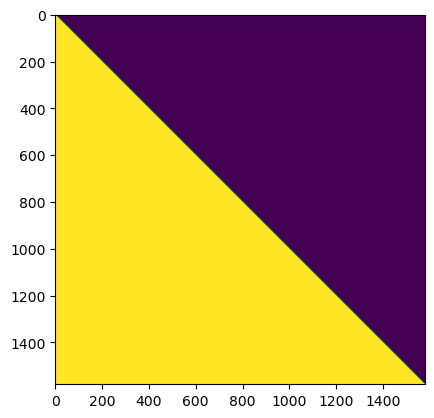

In [400]:
plt.imshow(mask[0])

In [416]:
mask.requires_grad = False
mask

tensor([[[ True, False, False,  ..., False, False, False],
         [ True,  True, False,  ..., False, False, False],
         [ True,  True,  True,  ..., False, False, False],
         ...,
         [ True,  True,  True,  ...,  True, False, False],
         [ True,  True,  True,  ...,  True,  True, False],
         [ True,  True,  True,  ...,  True,  True,  True]]])

In [418]:
output = model(x[:,:-1], mask)
output[0].shape

torch.Size([16, 2261, 10000])

In [433]:
import torch

In [435]:
output = torch.argmax(output[0], dim=-1)

In [441]:
import re

In [454]:
string = tokenizer.detokenize(output[1][w[1]])
string

"<bos>melissa nelson was fired in 2010 after working for dentist for 10 years .dr james knight fired 10-year assistant because she wore tight outfits and was 'irresistible 'assistant said she was happily married and only wore scrubs .all-male court 's december decision that dentist 's conduct did not constitute sexual harassment drew national attention ."

In [465]:
import pickle
with open('BPE_vocab_10000.pickle','rb') as fid:
    tmp = pickle.load(fid)
punctuations = tmp['punctuations'] + tmp['space']

In [466]:
punctuations

'\'`!,[)>%{="*}@.$(:;|/?&]+# '

In [475]:
string

"<bos>melissa nelson was fired in 2010 after working for dentist for 10 years .dr james knight fired 10-year assistant because she wore tight outfits and was 'irresistible 'assistant said she was happily married and only wore scrubs .all-male court 's december decision that dentist 's conduct did not constitute sexual harassment drew national attention ."

In [474]:
string.split('<bos>')

['',
 "melissa nelson was fired in 2010 after working for dentist for 10 years .dr james knight fired 10-year assistant because she wore tight outfits and was 'irresistible 'assistant said she was happily married and only wore scrubs .all-male court 's december decision that dentist 's conduct did not constitute sexual harassment drew national attention ."]

In [477]:
string.split(' ')[:10]

['<bos>melissa',
 'nelson',
 'was',
 'fired',
 'in',
 '2010',
 'after',
 'working',
 'for',
 'dentist']

In [479]:
string.split('<')[:10]

['',
 "bos>melissa nelson was fired in 2010 after working for dentist for 10 years .dr james knight fired 10-year assistant because she wore tight outfits and was 'irresistible 'assistant said she was happily married and only wore scrubs .all-male court 's december decision that dentist 's conduct did not constitute sexual harassment drew national attention ."]

In [487]:
re.findall(r'<bos>|<eos>|\w+', string)

['<bos>',
 'melissa',
 'nelson',
 'was',
 'fired',
 'in',
 '2010',
 'after',
 'working',
 'for',
 'dentist',
 'for',
 '10',
 'years',
 'dr',
 'james',
 'knight',
 'fired',
 '10',
 'year',
 'assistant',
 'because',
 'she',
 'wore',
 'tight',
 'outfits',
 'and',
 'was',
 'irresistible',
 'assistant',
 'said',
 'she',
 'was',
 'happily',
 'married',
 'and',
 'only',
 'wore',
 'scrubs',
 'all',
 'male',
 'court',
 's',
 'december',
 'decision',
 'that',
 'dentist',
 's',
 'conduct',
 'did',
 'not',
 'constitute',
 'sexual',
 'harassment',
 'drew',
 'national',
 'attention']

In [483]:
re.split(r'<bos>|\.|\s', string)

['',
 'melissa',
 'nelson',
 'was',
 'fired',
 'in',
 '2010',
 'after',
 'working',
 'for',
 'dentist',
 'for',
 '10',
 'years',
 '',
 'dr',
 'james',
 'knight',
 'fired',
 '10-year',
 'assistant',
 'because',
 'she',
 'wore',
 'tight',
 'outfits',
 'and',
 'was',
 "'irresistible",
 "'assistant",
 'said',
 'she',
 'was',
 'happily',
 'married',
 'and',
 'only',
 'wore',
 'scrubs',
 '',
 'all-male',
 'court',
 "'s",
 'december',
 'decision',
 'that',
 'dentist',
 "'s",
 'conduct',
 'did',
 'not',
 'constitute',
 'sexual',
 'harassment',
 'drew',
 'national',
 'attention',
 '',
 '']

In [489]:
'b' + '|'

'b|'

In [491]:
re.compile('|'.join(['<unk>', '<bos>', '<eos>', '<pad>']) + r'\w+')

re.compile(r'<unk>|<bos>|<eos>|<pad>\w+', re.UNICODE)

In [500]:
del sys.modules['bpe_tokenizer']
from bpe_tokenizer import BPETokenizer

In [501]:
tokenizer = BPETokenizer(None,
                         'BPE_vocab_10000.pickle',
                         max_tokens = 10000,
                         drop = 0.1,
                         max_len = 5000)

In [502]:
tokenizer.detokenize_as_split(output[1][w[1]])

['<bos>',
 'melissa',
 'nelson',
 'was',
 'fired',
 'in',
 '2010',
 'after',
 'working',
 'for',
 'dentist',
 'for',
 '10',
 'years',
 'dr',
 'james',
 'knight',
 'fired',
 '10',
 'year',
 'assistant',
 'because',
 'she',
 'wore',
 'tight',
 'outfits',
 'and',
 'was',
 'irresistible',
 'assistant',
 'said',
 'she',
 'was',
 'happily',
 'married',
 'and',
 'only',
 'wore',
 'scrubs',
 'all',
 'male',
 'court',
 's',
 'december',
 'decision',
 'that',
 'dentist',
 's',
 'conduct',
 'did',
 'not',
 'constitute',
 'sexual',
 'harassment',
 'drew',
 'national',
 'attention']

In [503]:
tokenizer.split_pat.pattern

'<unk>|<bos>|<eos>|<pad>|\\w+'

In [506]:
output.shape, x[:, 1:].shape

(torch.Size([16, 2261]), torch.Size([16, 2261]))

In [507]:
from torchtext.data.metrics import bleu_score

In [509]:
bleu_score([tokenizer.detokenize_as_split(output[1][w[1]])],
          [[tokenizer.detokenize_as_split(x[1,1:][w[1]])]])

0.9819746017456055

In [510]:
bleu_score([tokenizer.detokenize_as_split(output[0][w[0]])],
          [[tokenizer.detokenize_as_split(x[0,1:][w[0]])]])

0.9660519957542419

In [511]:
bleu_score([tokenizer.detokenize_as_split(output[0][w[0]]), tokenizer.detokenize_as_split(output[1][w[1]])],
          [[tokenizer.detokenize_as_split(x[0,1:][w[0]])], [tokenizer.detokenize_as_split(x[1,1:][w[1]])]])

0.9764540791511536

In [512]:
bleu_score([tokenizer.detokenize_as_split(output[0][w[0]]), tokenizer.detokenize_as_split(output[1][w[1]])],
          [[tokenizer.detokenize_as_split(x[1,1:][w[1]])], [tokenizer.detokenize_as_split(x[0,1:][w[0]])]])

0.0

In [517]:
output[0][w[0]].shape

torch.Size([45])

In [522]:
torch.tril(torch.ones(5, 5, dtype=torch.bool), diagonal=1)

tensor([[ True,  True, False, False, False],
        [ True,  True,  True, False, False],
        [ True,  True,  True,  True, False],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]])

## test v3

In [558]:
torch.tril(torch.ones(5, 5, dtype=torch.bool), diagonal=-1)

tensor([[False, False, False, False, False],
        [ True, False, False, False, False],
        [ True,  True, False, False, False],
        [ True,  True,  True, False, False],
        [ True,  True,  True,  True, False]])

In [561]:
import sys
del sys.modules['bpe_dataset_v3']
from bpe_dataset_v3 import BPEDataset

bpedataset = BPEDataset('dataset/dailymail/onebigfile_validation.npy',
                        'dataset/dailymail/onebigfile_validation.npy',
                        max_len = 2500,
                        batch_size = 16,
                        shuffle = False)
train, validation, train_loader, validation_loader = bpedataset.reset()

In [562]:
%%timeit
x, mask, w = next(iter(train_loader))

l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 12

l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 12

l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 12

2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l

l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 12

l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 12

2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l

2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l

l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 12

l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 12

2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126
l1, l2 404 95
l1, l

In [563]:
x, mask, w = next(iter(train_loader))

l1, l2 404 95
l1, l2 1281 124
l1, l2 2127 123
l1, l2 1051 17
l1, l2 513 78
l1, l2 573 49
l1, l2 601 37
l1, l2 699 88
l1, l2 1754 107
l1, l2 784 49
l1, l2 1120 45
l1, l2 1069 98
l1, l2 1029 42
l1, l2 730 73
l1, l2 586 57
l1, l2 681 54
2127 126


In [564]:
tokenizer.detokenize(x[1])

"by kerry mcdermott .published :.05 :50 est ,21 october 2012 .|.updated :.08 :21 est ,21 october 2012 .killer :christopher halliwell 's ex-girlfriend has told how they had sex hours after he murdered 22-year-old sian o 'callaghan .the former lover of killer christopher halliwell has revealed how they had sex just hours after the taxi-driver assaulted and murdered office worker sian o 'callaghan .heather widdowson was unaware when she got into bed with her 48-year-old partner that he had abducted and stabbed 22-year-old sian while out driving his cab in swindon in the early hours of that same morning .'he took me to bed that afternoon just hours after he killed her ,'the 55-year-old said ,as she described her revulsion at discovering what 'sick 'halliwell had done .'i don 't know how he managed to keep his feelings to himself but i remember he was laughing and joking ,'she said .ms widdowson also told the sun the divorced father-of-three text her to tell her he loved her shortly before 

In [565]:
tokenizer.detokenize(x[1,1:][w[1]])

"heather widdowson ,55 ,has said halliwell was 'completely normal 'when they spent the afternoon together hours after he killed sian o 'callaghan .taxi-driver sent his then partner a text to tell her he loved just before he carried out his brutal attack on 22-year-old sian in march 2011 .the following day he told heather he had a 'lot to do 'before taking the cab he used to abduct sian to a car wash .'sick 'halliwell put posters of sian up in his taxi as police searched for the missing girl ,ms widdowson said .<eos>"

In [566]:
output = model(x[:,:-1], mask)
output[0].shape

torch.Size([16, 2252, 10000])

In [567]:
output = torch.argmax(output[0], dim=-1)

In [568]:
tokenizer.detokenize(output[0][w[0]]), tokenizer.detokenize(x[0,1:][w[0]])

("<bos>edward miller ,52 ,was killed by a deputy sheriff in daytona beach ,florida .joel hernandez overheard heated argument over return of a car saturday .miller 's son - also called edward - says his father couldn 't hear officers .he was reportedly sitting in his suv when he was shot six times .miller had a gun ,and sheriff 's office says hernandez 'perceived a threat 'killing is under investigation by florida department of law enforcement .",
 "edward miller ,52 ,was killed by a deputy sheriff in daytona beach ,florida .joel hernandez overheard heated argument over return of a car saturday .miller 's son - also called edward - says his father couldn 't hear officers .he was reportedly sitting in his suv when he was shot six times .miller had a gun ,and sheriff 's office says hernandez 'perceived a threat 'killing is under investigation by florida department of law enforcement .<eos>")

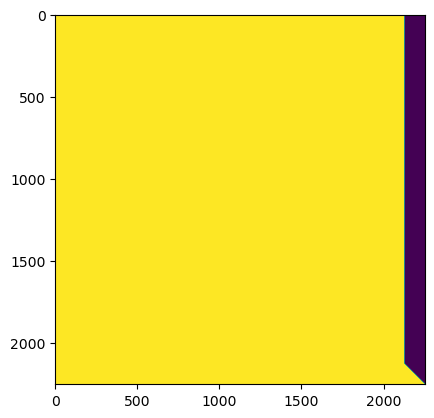

In [569]:
plt.imshow(mask[0])

In [570]:
mask[0][-1]

tensor([True, True, True,  ..., True, True, True])

In [571]:
from datetime import datetime

In [573]:
t1 = datetime.now()
t1.microsecond

401245